# Evaluating GSAT Score on Multiple Chinese LLM

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

In [55]:
dataset_df = pd.read_csv("./dataset-info.csv")
dataset_df.head()

,dataset_name,path,1_tile,2_tile,3_tile,4_tile,5_tile
0,112-ch,../dataset/chinese/112_chinese.csv,62.63,57.41,52.19,41.75,36.54
1,111-ch,../dataset/chinese/111_chinese.csv,64.08,58.74,48.06,42.72,32.04


In [56]:
model_df = pd.read_csv("./model-info.csv")
model_df.head()

,model,short_name,open,zh-tw
0,ikala/bloom-zh-3b-chat,bloom-3b,True,True
1,taide/Llama3-TAIDE-LX-8B-Chat-Alpha1,taide-8b,True,True
2,MediaTek-Research/Breeze-7B-32k-Instruct-v1_0,breeze-7b,True,True
3,Qwen/Qwen1.5-1.8B-Chat,qwen-1.8b,True,False
4,Qwen/Qwen1.5-4B-Chat,qwen-4b,True,False


In [92]:
test_name = "111-ch"
dataset_row = dataset_df[dataset_df["dataset_name"] == test_name]
dataset_row

,dataset_name,path,1_tile,2_tile,3_tile,4_tile,5_tile
0,112-ch,../dataset/chinese/112_chinese.csv,62.63,57.41,52.19,41.75,36.54


In [93]:
scores = []
# dataset_df.where(dataset_df["dataset_name"]==test_name)["path"].values[0]
for _ , model in model_df.iterrows():
    try:
        model_test_df = pd.read_csv(f'./{test_name}-result-{model["short_name"]}.csv')
        scores.append(model_test_df["score"].sum())
    except:
        scores.append(0.0)

model_df["score"] = scores
model_df["score"] /= len(pd.read_csv(dataset_row["path"].values[0]).index)
model_df["score"] *= 100
model_df = model_df.sort_values(["score"])

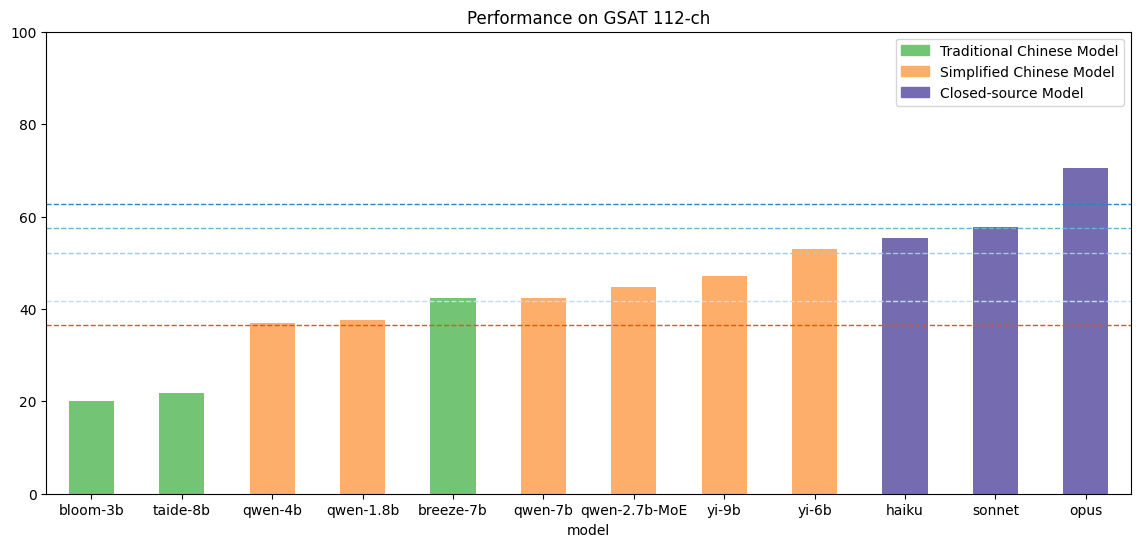

In [94]:
cm = matplotlib.colormaps.get_cmap("tab20c")
model_df.plot.bar(x='short_name', y='score', rot=0 , title=f"Performance on GSAT {test_name}" , xlabel="model",figsize=(14,6) , color=[cm.colors[12] if model["open"] is False else (cm.colors[9] if model["zh-tw"] is True else cm.colors[6]) for _,  model in model_df.iterrows() ] ,legend = False,ylim = [0,100])
plt.axhline(y=dataset_row["1_tile"].values[0],linewidth=1,ls="--" ,color=cm.colors[0], label="12th")
plt.axhline(y=dataset_row["2_tile"].values[0],linewidth=1,ls="--" ,color=cm.colors[1],label="25th")
plt.axhline(y=dataset_row["3_tile"].values[0],linewidth=1,ls="--" ,color=cm.colors[2], label="50th")
plt.axhline(y=dataset_row["4_tile"].values[0],linewidth=1,ls="--" ,color=cm.colors[3], label="75th")
plt.axhline(y=dataset_row["5_tile"].values[0],linewidth=1,ls="--" ,color=cm.colors[4], label="88th")

tw = mpatches.Patch(color=cm.colors[9], label='Traditional Chinese Model')
cn = mpatches.Patch(color=cm.colors[6], label='Simplified Chinese Model')
cs = mpatches.Patch(color=cm.colors[12], label='Closed-source Model')
plt.legend(handles=[tw , cn , cs])